# Graphics of Ne Line Ratios Histograms and Ne Line Ratios vs fracAGN

In [1]:
from astropy.table import Table, Column, table, vstack, join
from pathlib import Path

import numpy as np
import pandas as pd
import astropy.units as u

from matplotlib import pyplot as plt

In [2]:
path_CIGALE_phot = '../Datos/Work/CIGALE_InputPhot/'
path_CIGALE_out = '../Datos/Work/CIGALE_Output/'
path_graphs = '../Datos/Final/Graphics/'
path_FINAL = '../Datos/Final/'

In [3]:
Ne_Sy = Table.read(path_FINAL+'Ne_ratios_-_CIGALE_results.tbl', format='ascii')
Ne_Sy_bib = Table.read(path_FINAL+'Ne_ratios_-_CIGALE_results_bib.tbl', format='ascii')

In [4]:
Ne_Sy1 = Ne_Sy[Ne_Sy['otype']=='Sy1']
Ne_Sy2 = Ne_Sy[Ne_Sy['otype']=='Sy2']
Ne_SyG = Ne_Sy[Ne_Sy['otype']=='SyG']

Ne_Sy1_bib = Ne_Sy_bib[Ne_Sy_bib['otype']=='Sy1']
Ne_Sy2_bib = Ne_Sy_bib[Ne_Sy_bib['otype']=='Sy2']
Ne_SyG_bib = Ne_Sy_bib[Ne_Sy_bib['otype']=='SyG']

In [5]:
Ne_Sy1

Main_id,RA,DEC,otype,redshift,[NeV]/[NeII],[NeV]/[NeII]_err,[NeV]/[NeIII],[NeV]/[NeIII]_err,[NeIII]/[NeII],[NeIII]/[NeII]_err,bayes.agn.fracAGN,bayes.agn.fracAGN_err,bayes.agn.i,bayes.agn.i_err,best.reduced_chi_square
str25,float64,float64,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2E 2389,166.0577547903,76.98283181919,Sy1,0.3115,1.1556064073226544,0.17151303566833198,nan,nan,nan,nan,0.8184210019817609,0.02413496360285592,27.186168205481057,10.652860210024379,1.4502115241831317
2E 3648,245.09091058141,17.60665343366,Sy1,0.55517,1.7878787878787878,0.279439361062646,0.7391975308641976,nan,2.4545454545454546,0.2468333394786096,0.7437710848035028,0.09751934233157432,39.19947158716953,3.128758941848712,2.285716871590449
2MASS J00070361+1554238,1.76504755743,15.906575893419998,Sy1,0.11405,1.1746724890829694,nan,0.5085066162570888,nan,2.3100436681222707,nan,0.7159038375208355,0.05284894140341326,15.399676980778787,12.788757582113233,1.227168470785353
2MASS J10434845+5811477,160.95198312577,58.19656961894,Sy1,0.07317,nan,nan,nan,nan,0.1182825484764543,0.015306636274754247,0.8999044730680125,0.002245014447722756,8.480373425852274,9.212272322240578,58.841736258057026
2MASS J10514425+3539307,162.9343616698,35.65853695596999,Sy1,0.15879,0.9147727272727273,nan,0.5331125827814569,nan,1.7159090909090908,nan,0.739336498151863,0.06704712731207804,66.04742180385735,5.360677620273422,1.3140030090149162
2MASS J13000535+1632148,195.02228295163,16.53743305218,Sy1,0.07993,nan,nan,nan,nan,0.8682634730538922,nan,0.899273174709466,0.005985980504553072,60.00034211182109,0.058489411166235517,2.8333819812086842
2MASS J14533151+1353587,223.38130978550004,13.89961126183,Sy1,0.13901,nan,nan,nan,nan,0.9958071278825996,nan,0.3789370779338508,0.11119084937583053,62.66029118693765,5.618746122851261,1.799265805098418
2MASSI J0918486+211717,139.7025485953,21.288075035289996,Sy1,0.14903,4.562118126272912,nan,1.7230769230769232,nan,2.6476578411405294,nan,0.8995098854350043,0.007715830772557651,50.01004571723997,0.31681308120409535,0.8587540073395079
2MASX J14510879+2709272,222.78651997439997,27.15748964087,Sy1,0.06449,5.266272189349112,nan,nan,nan,nan,nan,0.8999803937391425,0.000990197768258662,7.386806381306073,7.783380251815781,1.3349217285477062


### [NeV]/[NeII]

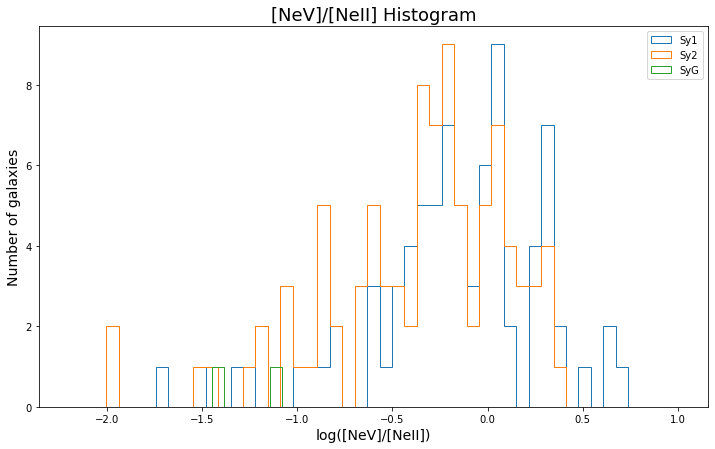

In [6]:
x_NeV_NeII_Sy1 = np.log10(Ne_Sy1['[NeV]/[NeII]'])
x_NeV_NeII_Sy2 = np.log10(Ne_Sy2['[NeV]/[NeII]'])
x_NeV_NeII_SyG = np.log10(Ne_SyG['[NeV]/[NeII]'])
bins_NeV_NeII_Sy1 = np.linspace(-2.2,1,50)
bins_NeV_NeII_Sy2 = np.linspace(-2.2,1,50)
bins_NeV_NeII_SyG = np.linspace(-2.,1,50)
plt.figure(figsize=(12,7))
plt.hist(x_NeV_NeII_Sy1, bins=bins_NeV_NeII_Sy1, histtype='step', label='Sy1')
plt.hist(x_NeV_NeII_Sy2, bins=bins_NeV_NeII_Sy2, histtype='step', label='Sy2')
plt.hist(x_NeV_NeII_SyG, bins=bins_NeV_NeII_SyG, histtype='step', label='SyG')
plt.xlabel('log([NeV]/[NeII])',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.title('[NeV]/[NeII] Histogram', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'hist_NeV_NeII_Sy.jpg')

/home/jonhatan/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


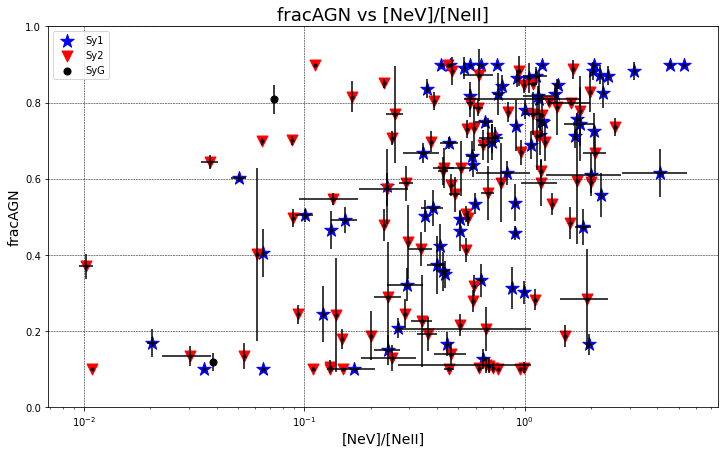

In [7]:
plt.figure(figsize=(12,7))
plt.scatter(Ne_Sy1['[NeV]/[NeII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*',label='Sy1')
plt.errorbar(Ne_Sy1['[NeV]/[NeII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['[NeV]/[NeII]_err'], fmt='k.')
plt.scatter(Ne_Sy2['[NeV]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v', label='Sy2')
plt.errorbar(Ne_Sy2['[NeV]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['[NeV]/[NeII]_err'], fmt='k.')
plt.scatter(Ne_SyG['[NeV]/[NeII]'], Ne_SyG['bayes.agn.fracAGN'],200, color='black', marker = '.', label='SyG')
plt.errorbar(Ne_SyG['[NeV]/[NeII]'], Ne_SyG['bayes.agn.fracAGN'],\
             Ne_SyG['bayes.agn.fracAGN_err'], Ne_SyG['[NeV]/[NeII]_err'], fmt='k.')
plt.xlabel(r'[NeV]/[NeII]', fontsize=14)
plt.xscale('log')
#plt.yscale('log')
plt.ylabel(r'fracAGN', fontsize=14)
plt.ylim(0.0,1.0)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.title(r'fracAGN vs [NeV]/[NeII]', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'NeV_NeII_vs_fracAGN_Sy.jpg')

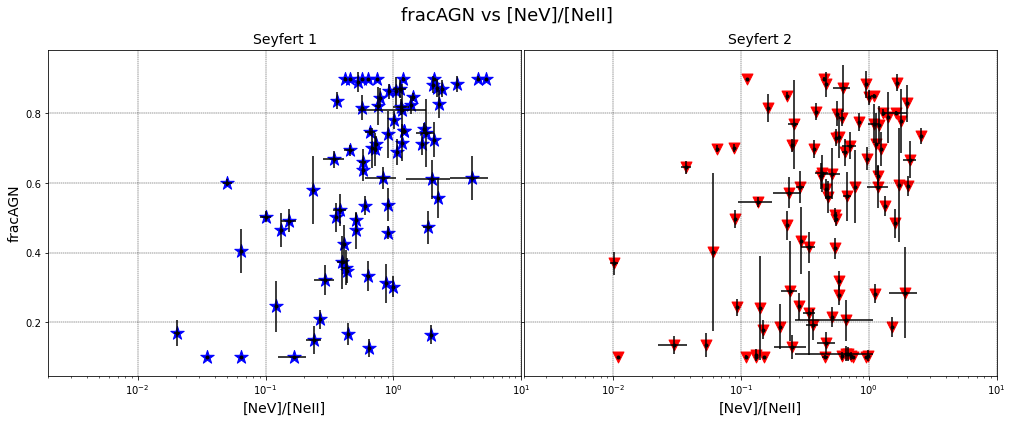

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'fracAGN vs [NeV]/[NeII]', fontsize=18)
ax1.scatter(Ne_Sy1['[NeV]/[NeII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*')
ax1.errorbar(Ne_Sy1['[NeV]/[NeII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['[NeV]/[NeII]_err'], fmt='k.')
ax1.set_xlim(20e-4,10e0)
ax1.set_xscale("log")
ax1.set_xlabel(r'[NeV]/[NeII]', fontsize=14)
#ax1.set_yscale("log")
ax1.set_ylabel(r'fracAGN', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(Ne_Sy2['[NeV]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v')
ax2.errorbar(Ne_Sy2['[NeV]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['[NeV]/[NeII]_err'], fmt='k.')
ax2.set_xlim(20e-4,10e0)
ax2.set_xscale("log")
ax2.set_xlabel(r'[NeV]/[NeII]', fontsize=14)
#ax2.set_yscale("log")
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.005) #Space between subplots
plt.savefig(path_graphs+'NeV_NeII_vs_fracAGN_Sy1_vs_Sy2.jpg')

### [NeV]/[NeIII]

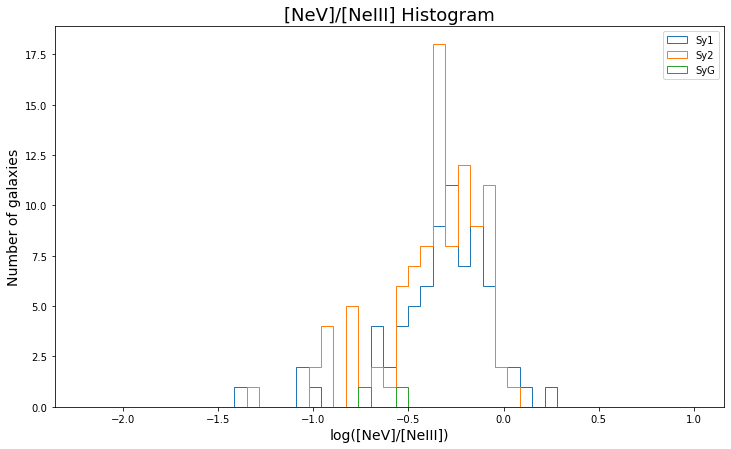

In [9]:
x_NeV_NeIII_Sy1 = np.log10(Ne_Sy1['[NeV]/[NeIII]'])
x_NeV_NeIII_Sy2 = np.log10(Ne_Sy2['[NeV]/[NeIII]'])
x_NeV_NeIII_SyG = np.log10(Ne_SyG['[NeV]/[NeIII]'])
bins_NeV_NeIII_Sy1 = np.linspace(-2.2,1,50)
bins_NeV_NeIII_Sy2 = np.linspace(-2.2,1,50)
bins_NeV_NeIII_SyG = np.linspace(-2.2,1,50)
plt.figure(figsize=(12,7))
plt.hist(x_NeV_NeIII_Sy1, bins=bins_NeV_NeIII_Sy1, histtype='step', label='Sy1')
plt.hist(x_NeV_NeIII_Sy2, bins=bins_NeV_NeIII_Sy2, histtype='step', label='Sy2')
plt.hist(x_NeV_NeIII_SyG, bins=bins_NeV_NeIII_SyG, histtype='step', label='SyG')
plt.xlabel('log([NeV]/[NeIII])',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.title('[NeV]/[NeIII] Histogram', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'hist_NeV_NeIII_Sy.jpg')

/home/jonhatan/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


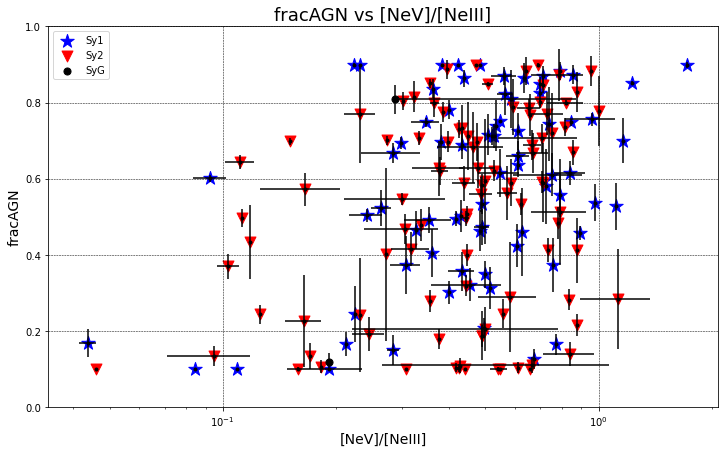

In [10]:
plt.figure(figsize=(12,7))
plt.scatter(Ne_Sy1['[NeV]/[NeIII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*',label='Sy1')
plt.errorbar(Ne_Sy1['[NeV]/[NeIII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['[NeV]/[NeIII]_err'], fmt='k.')
plt.scatter(Ne_Sy2['[NeV]/[NeIII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v', label='Sy2')
plt.errorbar(Ne_Sy2['[NeV]/[NeIII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['[NeV]/[NeIII]_err'], fmt='k.')
plt.scatter(Ne_SyG['[NeV]/[NeIII]'], Ne_SyG['bayes.agn.fracAGN'],200, color='black', marker = '.', label='SyG')
plt.errorbar(Ne_SyG['[NeV]/[NeIII]'], Ne_SyG['bayes.agn.fracAGN'],\
             Ne_SyG['bayes.agn.fracAGN_err'], Ne_SyG['[NeV]/[NeIII]_err'], fmt='k.')
plt.xlabel(r'[NeV]/[NeIII]', fontsize=14)
plt.xscale('log')
plt.ylabel(r'fracAGN', fontsize=14)
plt.ylim(0.0,1.0)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.title(r'fracAGN vs [NeV]/[NeIII]', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'NeV_NeIII_vs_fracAGN_Sy.jpg')

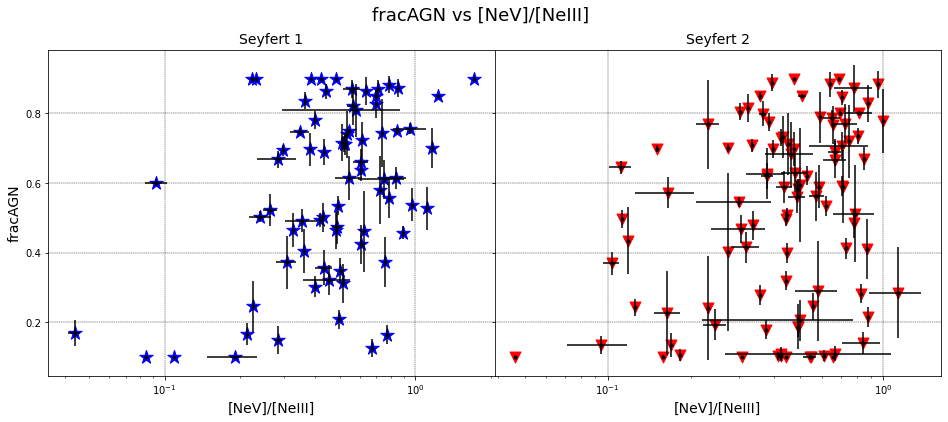

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6),sharey=True)
fig.suptitle(r'fracAGN vs [NeV]/[NeIII]', fontsize=18)
ax1.scatter(Ne_Sy1['[NeV]/[NeIII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*')
ax1.errorbar(Ne_Sy1['[NeV]/[NeIII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['[NeV]/[NeIII]_err'], fmt='k.')
ax1.set_xscale("log")
ax1.set_xlabel(r'[NeV]/[NeIII]', fontsize=14)
ax1.set_ylabel(r'fracAGN', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(Ne_Sy2['[NeV]/[NeIII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v')
ax2.errorbar(Ne_Sy2['[NeV]/[NeIII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['[NeV]/[NeIII]_err'], fmt='k.')
ax2.set_xscale("log")
ax2.set_xlabel(r'[NeV]/[NeIII]', fontsize=14)
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0) #Space between subplots
plt.savefig(path_graphs+'NeV_NeIII_vs_fracAGN_Sy1_vs_Sy2.jpg')

### [NeIII]/[NeII]

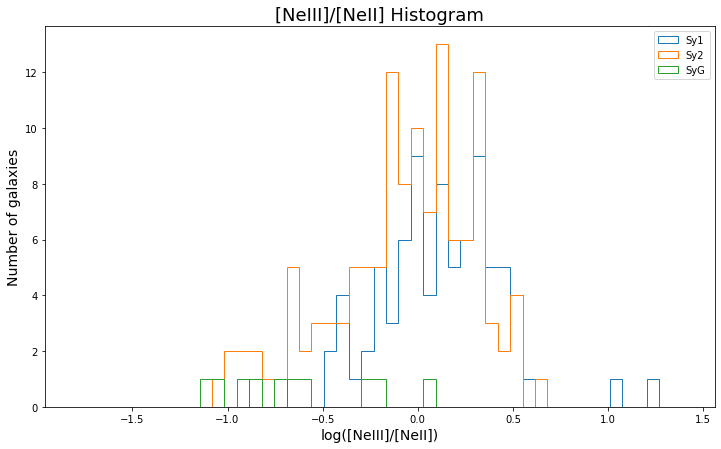

In [12]:
x_NeIII_NeII_Sy1 = np.log10(Ne_Sy1['[NeIII]/[NeII]'])
x_NeIII_NeII_Sy2 = np.log10(Ne_Sy2['[NeIII]/[NeII]'])
x_NeIII_NeII_SyG = np.log10(Ne_SyG['[NeIII]/[NeII]'])
bins_NeIII_NeII_Sy1 = np.linspace(-1.8,1.4,50)
bins_NeIII_NeII_Sy2 = np.linspace(-1.8,1.4,50)
bins_NeIII_NeII_SyG = np.linspace(-1.8,1.4,50)
plt.figure(figsize=(12,7))
plt.hist(x_NeIII_NeII_Sy1, bins=bins_NeIII_NeII_Sy1, histtype='step', label='Sy1')
plt.hist(x_NeIII_NeII_Sy2, bins=bins_NeIII_NeII_Sy2, histtype='step', label='Sy2')
plt.hist(x_NeIII_NeII_SyG, bins=bins_NeIII_NeII_SyG, histtype='step', label='SyG')
plt.xlabel('log([NeIII]/[NeII])',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.title('[NeIII]/[NeII] Histogram', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'hist_NeIII_NeII_Sy.jpg')

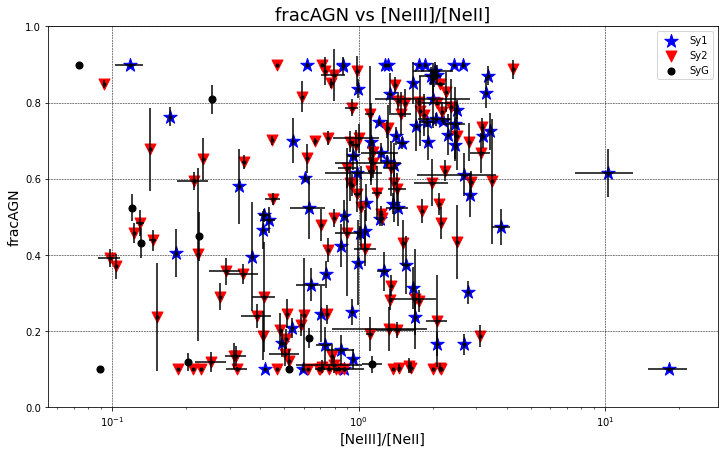

In [13]:
plt.figure(figsize=(12,7))
plt.scatter(Ne_Sy1['[NeIII]/[NeII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*',label='Sy1')
plt.errorbar(Ne_Sy1['[NeIII]/[NeII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['[NeIII]/[NeII]_err'], fmt='k.')
plt.scatter(Ne_Sy2['[NeIII]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v', label='Sy2')
plt.errorbar(Ne_Sy2['[NeIII]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['[NeIII]/[NeII]_err'], fmt='k.')
plt.scatter(Ne_SyG['[NeIII]/[NeII]'], Ne_SyG['bayes.agn.fracAGN'],200, color='black', marker = '.', label='SyG')
plt.errorbar(Ne_SyG['[NeIII]/[NeII]'], Ne_SyG['bayes.agn.fracAGN'],\
             Ne_SyG['bayes.agn.fracAGN_err'], Ne_SyG['[NeIII]/[NeII]_err'], fmt='k.')
plt.xlabel(r'[NeIII]/[NeII]', fontsize=14)
plt.xscale('log')
plt.ylabel(r'fracAGN', fontsize=14)
plt.ylim(0.0,1.0)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.title(r'fracAGN vs [NeIII]/[NeII]', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'NeIII_NeII_vs_fracAGN_Sy.jpg')

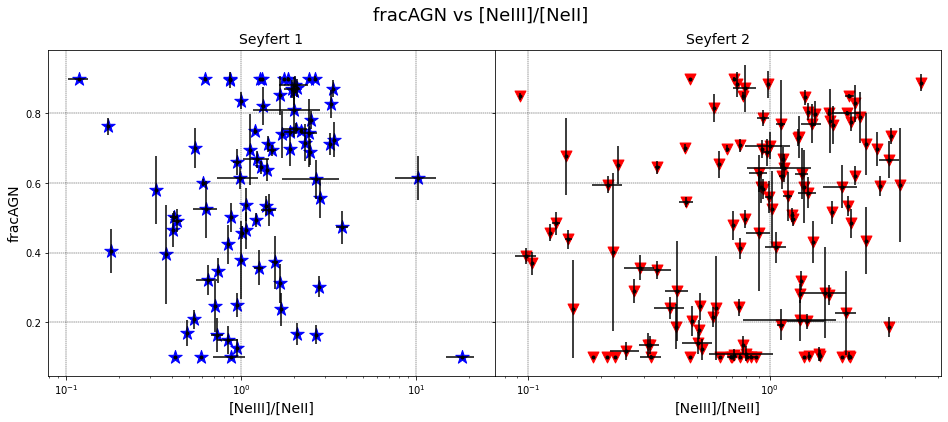

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6),sharey=True)
fig.suptitle(r'fracAGN vs [NeIII]/[NeII]', fontsize=18)
ax1.scatter(Ne_Sy1['[NeIII]/[NeII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*')
ax1.errorbar(Ne_Sy1['[NeIII]/[NeII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['[NeIII]/[NeII]_err'], fmt='k.')
ax1.set_xscale("log")
ax1.set_xlabel(r'[NeIII]/[NeII]', fontsize=14)
ax1.set_ylabel(r'fracAGN', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(Ne_Sy2['[NeIII]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v')
ax2.errorbar(Ne_Sy2['[NeIII]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['[NeIII]/[NeII]_err'], fmt='k.')
ax2.set_xscale("log")
ax2.set_xlabel(r'[NeIII]/[NeII]', fontsize=14)
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0) #Space between subplots
plt.savefig(path_graphs+'NeIII_NeII_vs_fracAGN_Sy1_vs_Sy2.jpg')

## Graphics of Ne Line Ratios Histograms and Ne Line Ratios vs fracAGN but now by bibcode in each galaxy

### [NeV]/[NeII]

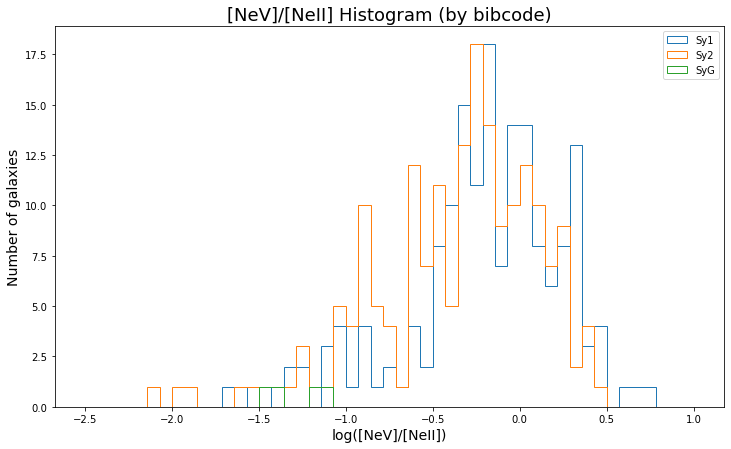

In [15]:
x_NeV_NeII_Sy1_bib = np.log10(Ne_Sy1_bib['[NeV]/[NeII]'])
x_NeV_NeII_Sy2_bib = np.log10(Ne_Sy2_bib['[NeV]/[NeII]'])
x_NeV_NeII_SyG_bib = np.log10(Ne_SyG_bib['[NeV]/[NeII]'])
bins_NeV_NeII_Sy1_bib = np.linspace(-2.5,1,50)
bins_NeV_NeII_Sy2_bib = np.linspace(-2.5,1,50)
bins_NeV_NeII_SyG_bib = np.linspace(-2.5,1,50)
plt.figure(figsize=(12,7))
plt.hist(x_NeV_NeII_Sy1_bib, bins=bins_NeV_NeII_Sy1_bib, histtype='step', label='Sy1')
plt.hist(x_NeV_NeII_Sy2_bib, bins=bins_NeV_NeII_Sy2_bib, histtype='step', label='Sy2')
plt.hist(x_NeV_NeII_SyG_bib, bins=bins_NeV_NeII_SyG_bib, histtype='step', label='SyG')
plt.xlabel('log([NeV]/[NeII])',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.title('[NeV]/[NeII] Histogram (by bibcode)', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'hist_NeV_NeII_Sy_bib.jpg')

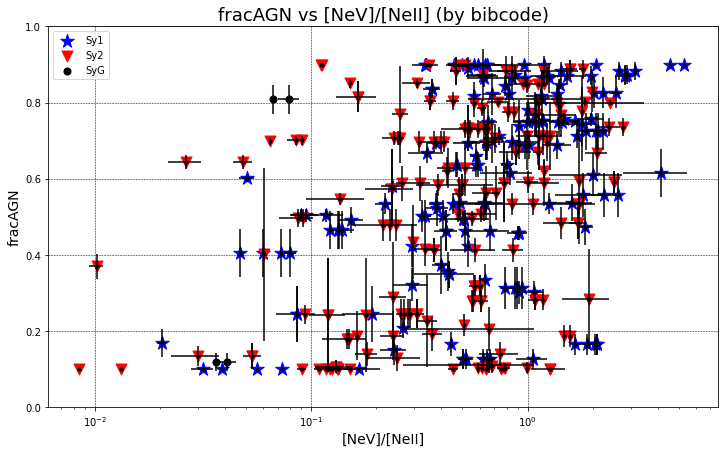

In [16]:
plt.figure(figsize=(12,7))
plt.scatter(Ne_Sy1_bib['[NeV]/[NeII]'],Ne_Sy1_bib['bayes.agn.fracAGN'],200,color='blue',marker = '*',label='Sy1')
plt.errorbar(Ne_Sy1_bib['[NeV]/[NeII]'], Ne_Sy1_bib['bayes.agn.fracAGN'],\
             Ne_Sy1_bib['bayes.agn.fracAGN_err'], Ne_Sy1_bib['[NeV]/[NeII]_err'], fmt='k.')
plt.scatter(Ne_Sy2_bib['[NeV]/[NeII]'], Ne_Sy2_bib['bayes.agn.fracAGN'],120, color='red', marker = 'v', label='Sy2')
plt.errorbar(Ne_Sy2_bib['[NeV]/[NeII]'], Ne_Sy2_bib['bayes.agn.fracAGN'],\
             Ne_Sy2_bib['bayes.agn.fracAGN_err'], Ne_Sy2_bib['[NeV]/[NeII]_err'], fmt='k.')
plt.scatter(Ne_SyG_bib['[NeV]/[NeII]'], Ne_SyG_bib['bayes.agn.fracAGN'],200, color='black', marker = '.', label='SyG')
plt.errorbar(Ne_SyG_bib['[NeV]/[NeII]'], Ne_SyG_bib['bayes.agn.fracAGN'],\
             Ne_SyG_bib['bayes.agn.fracAGN_err'], Ne_SyG_bib['[NeV]/[NeII]_err'], fmt='k.')
plt.xlabel(r'[NeV]/[NeII]', fontsize=14)
plt.xscale('log')
plt.ylabel(r'fracAGN', fontsize=14)
plt.ylim(0.0,1.0)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.title(r'fracAGN vs [NeV]/[NeII] (by bibcode)', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'NeV_NeII_vs_fracAGN_Sy_bib.jpg')

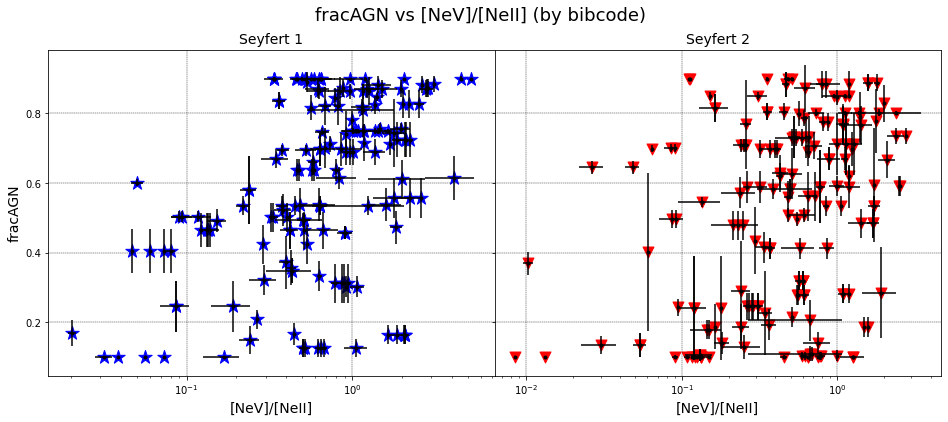

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6),sharey=True)
fig.suptitle(r'fracAGN vs [NeV]/[NeII] (by bibcode)', fontsize=18)
ax1.scatter(Ne_Sy1_bib['[NeV]/[NeII]'],Ne_Sy1_bib['bayes.agn.fracAGN'],200,color='blue',marker = '*')
ax1.errorbar(Ne_Sy1_bib['[NeV]/[NeII]'], Ne_Sy1_bib['bayes.agn.fracAGN'],\
             Ne_Sy1_bib['bayes.agn.fracAGN_err'], Ne_Sy1_bib['[NeV]/[NeII]_err'], fmt='k.')
ax1.set_xscale("log")
ax1.set_xlabel(r'[NeV]/[NeII]', fontsize=14)
ax1.set_ylabel(r'fracAGN', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(Ne_Sy2_bib['[NeV]/[NeII]'], Ne_Sy2_bib['bayes.agn.fracAGN'],120, color='red', marker = 'v')
ax2.errorbar(Ne_Sy2_bib['[NeV]/[NeII]'], Ne_Sy2_bib['bayes.agn.fracAGN'],\
             Ne_Sy2_bib['bayes.agn.fracAGN_err'], Ne_Sy2_bib['[NeV]/[NeII]_err'], fmt='k.')
ax2.set_xscale("log")
ax2.set_xlabel(r'[NeV]/[NeII]', fontsize=14)
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0) #Space between subplots
plt.savefig(path_graphs+'NeV_NeII_vs_fracAGN_Sy1_vs_Sy2_bib.jpg')

## Correlations

In [18]:
#Seyfert 1
log_NeVNeII_Sy1 = np.log10(Ne_Sy1['[NeV]/[NeII]'])
log_NeVNeIII_Sy1 = np.log10(Ne_Sy1['[NeV]/[NeIII]'])
log_NeIIINeII_Sy1 = np.log10(Ne_Sy1['[NeIII]/[NeII]'])
log_fracAGN_Sy1 = np.log10(Ne_Sy1['bayes.agn.fracAGN'])

Ne_Sy1['log_[NeV]/[NeII]'] = log_NeVNeII_Sy1
Ne_Sy1['log_[NeV]/[NeIII]'] = log_NeVNeIII_Sy1
Ne_Sy1['log_[NeIII]/[NeII]'] = log_NeIIINeII_Sy1
Ne_Sy1['log_bayes.agn.fracAGN'] = log_fracAGN_Sy1

#Seyfert 2
log_NeVNeII_Sy2 = np.log10(Ne_Sy2['[NeV]/[NeII]'])
log_NeVNeIII_Sy2 = np.log10(Ne_Sy2['[NeV]/[NeIII]'])
log_NeIIINeII_Sy2 = np.log10(Ne_Sy2['[NeIII]/[NeII]'])
log_fracAGN_Sy2 = np.log10(Ne_Sy2['bayes.agn.fracAGN'])

Ne_Sy2['log_[NeV]/[NeII]'] = log_NeVNeII_Sy2
Ne_Sy2['log_[NeV]/[NeIII]'] = log_NeVNeIII_Sy2
Ne_Sy2['log_[NeIII]/[NeII]'] = log_NeIIINeII_Sy2
Ne_Sy2['log_bayes.agn.fracAGN'] = log_fracAGN_Sy2

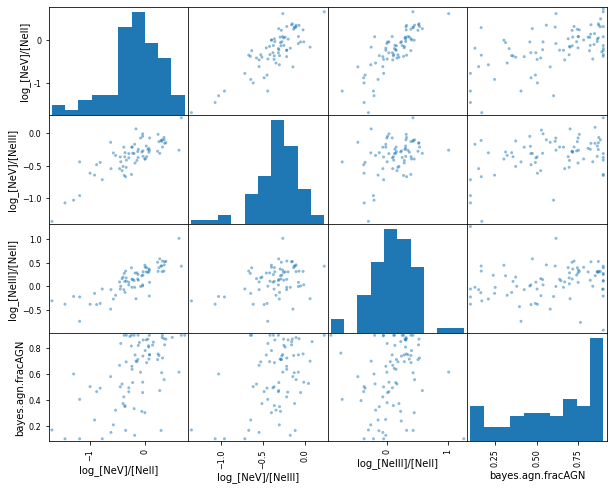

In [19]:
df_Ne_Sy1 = Ne_Sy1.to_pandas()
df_Ne_Sy2 = Ne_Sy2.to_pandas()

attributes=['log_[NeV]/[NeII]', 'log_[NeV]/[NeIII]', 'log_[NeIII]/[NeII]', 'bayes.agn.fracAGN']
scatMatrix_Sy1=pd.plotting.scatter_matrix(df_Ne_Sy1[attributes], figsize=(10,8))

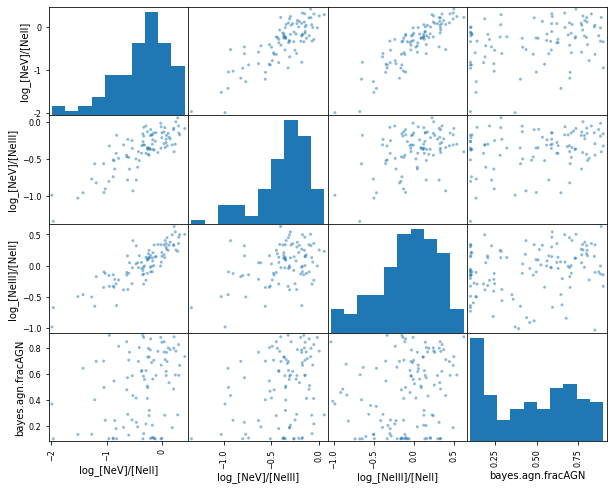

In [20]:
scatMatrix_Sy2=pd.plotting.scatter_matrix(df_Ne_Sy2[attributes], figsize=(10,8))

In [21]:
conc_corr_Sy1 = df_Ne_Sy1.corr()['bayes.agn.fracAGN']
conc_corr_Sy1

RA                        -0.077775
DEC                       -0.006815
redshift                   0.056923
[NeV]/[NeII]               0.424534
[NeV]/[NeII]_err           0.276108
[NeV]/[NeIII]              0.351871
[NeV]/[NeIII]_err          0.393523
[NeIII]/[NeII]            -0.042758
[NeIII]/[NeII]_err        -0.191884
bayes.agn.fracAGN          1.000000
bayes.agn.fracAGN_err     -0.258909
bayes.agn.i               -0.241499
bayes.agn.i_err           -0.358147
best.reduced_chi_square   -0.143402
log_[NeV]/[NeII]           0.576657
log_[NeV]/[NeIII]          0.419097
log_[NeIII]/[NeII]         0.181229
log_bayes.agn.fracAGN      0.959891
Name: bayes.agn.fracAGN, dtype: float64

In [22]:
conc_corr_Sy2 = df_Ne_Sy2.corr()['bayes.agn.fracAGN']
conc_corr_Sy2

RA                        -0.106621
DEC                       -0.229296
redshift                   0.060172
[NeV]/[NeII]               0.306711
[NeV]/[NeII]_err          -0.167845
[NeV]/[NeIII]              0.241790
[NeV]/[NeIII]_err         -0.337006
[NeIII]/[NeII]             0.276480
[NeIII]/[NeII]_err        -0.017854
bayes.agn.fracAGN          1.000000
bayes.agn.fracAGN_err      0.150408
bayes.agn.i                0.211386
bayes.agn.i_err           -0.481673
best.reduced_chi_square   -0.239650
log_[NeV]/[NeII]           0.315217
log_[NeV]/[NeIII]          0.277124
log_[NeIII]/[NeII]         0.247482
log_bayes.agn.fracAGN      0.965206
Name: bayes.agn.fracAGN, dtype: float64

## Notebook Info

In [23]:
%reload_ext watermark
%watermark -a "Jonhatan Bernal" -d -v -m
print('Specific Python packages')
%watermark -iv -w --packages astropy

Author: Jonhatan Bernal

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.4.0

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.15.0-47-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Specific Python packages
astropy: 5.1

pandas    : 1.4.3
numpy     : 1.21.5
matplotlib: 3.5.1
astropy   : 5.1

Watermark: 2.3.1

